
<center>
<img src="https://i.postimg.cc/dVMLXnB3/d1801093-8431-4d05-a78b-6e07066ec8c9.png" alt="Drawing" />
</center>

<center><h1> Notebook - Projet A5 - Intelligence Artificielle
 </h1></center>

**Groupe de Projet**

- Sébastien CROUZET

- Jules LAVERGNE

- Sacha THOMMET

- Pierre YRIARTE

L’ensemble des réalisation techniques et données ayant étés nécessaires dans le cadre de la rédaction de cette étude est disponible sur GitHub: https://github.com/YoungPedro09/FISA-A5-IA/

# Sommaire
* [Introduction](#introduction)
* [Contexte](#contexte)
* [Préparation de l'environnement](#preparation-de-lenvironnement)
* [Import des données](#import-des-donnees)
* [Etude des sources des données](#etude-des-sources-de-donnees)
* [Création d'un jeu de test](#creation-jeu-de-test)
* [Echantillonage stratifié](#echantillonage-stratifie)
* [Conclusion](#conclusion)
* [Bibliographie](#bibliographie)


# Introduction

L'intelligence artificielle (IA) représente une des avancées technologiques les plus importantes de notre époque. Elle fait référence à la simulation de processus de pensées humaines par des machines, notamment les ordinateurs. Cette technologie englobe divers domaines comme l'apprentissage automatique (machine learning), le traitement du langage naturel, et la reconnaissance de formes.

La capacité de l'IA à analyser rapidement de grandes quantités de données et à en tirer des conclusions significatives est l'une de ses applications les plus utiles. Cela a conduit à des innovations majeures dans de nombreux domaines, tels que la santé, où l'IA est utilisée pour des diagnostics plus précis et pour personnaliser les traitements. Dans le secteur financier, elle permet d'analyser des tendances de marché complexes pour la prise de décisions d'investissement. De même, dans le domaine de la fabrication, l'IA optimise les chaînes de production, améliorant ainsi l'efficacité et réduisant les coûts.L'IA joue en outre un rôle crucial dans l'analyse des comportements des consommateurs, offrant aux entreprises des informations précieuses pour leurs stratégies marketing. Elle est également un pilier dans le développement de solutions de mobilité intelligente, comme les véhicules autonomes.

Cependant, avec cette technologie puissante vient une grande responsabilité. Les questions éthiques autour de la confidentialité des données, de la non-discrimination et de la transparence des décisions algorithmiques sont au cœur des préoccupations actuelles. Cela a conduit à une prise de conscience croissante de l'importance d'adopter une approche éthique et responsable dans le déploiement de solutions d'IA.

Alors que l'IA continue de transformer divers secteurs, son application dans la gestion des ressources humaines représente un domaine d'opportunité et d'innovation  prometteur. En comprenant les motifs et les tendances derrière le comportement des employés, les entreprises peuvent non seulement améliorer leur environnement de travail, mais également accroître l'efficacité opérationnelle et la satisfaction des employés. C'est d'autant plus vrai dans des contextes où la rotation du personnel pose des défis uniques, comme c'est le cas chez HumanForYou.

Notre projet se situe à l'intersection de ces enjeux, cherchant à exploiter le potentiel de l'IA pour adresser des problématiques RH spécifiques. Ainsi, nous nous embarquons dans une exploration détaillée des données de HumanForYou, avec l'objectif d'apporter des solutions innovantes et éthiquement responsables à leurs défis en matière de gestion du personnel.



# Contexte

Ce projet implique donc une collaboration avec HumanForYou, une entreprise pharmaceutique indienne d'envergure, confrontée à un défi crucial : un taux de rotation du personnel d'environ 15 % par an. Cette situation présente de nombreux inconvénients pour l'entreprise, tels que des retards dans les projets, la nécessité d'un service RH conséquent pour le recrutement, ainsi que le temps et les ressources nécessaires pour former les nouveaux employés.

L'objectif de ce projet est de mettre en œuvre des solutions d'IA pour analyser et comprendre les facteurs influençant ce taux de rotation élevé. En exploitant les données fournies par HumanForYou, y compris les informations démographiques, professionnelles et les retours des employés, nous chercherons à identifier les tendances et les modèles pouvant aider à améliorer la rétention des employés.

L'approche consistera à préparer et analyser ces données, en sélectionnant et en testant divers algorithmes d'IA pour déterminer les plus pertinents en fonction de nos objectifs. Cette analyse doit être effectuée tout en respectant les principes éthiques, notamment en matière de confidentialité des données et de non-discrimination.

Ce projet vise non seulement à résoudre un problème commercial pressant pour HumanForYou, mais aussi à démontrer comment l'IA peut être appliquée de manière éthique et efficace pour améliorer les pratiques de gestion des ressources humaines dans l'industrie pharmaceutique.


<a id="preparation-de-lenvironnement"></a>
# Préparation de l'environnement




In [92]:
try:
    import numpy as np
except ImportError:
    !pip install numpy
    import numpy as np
try:
    import pandas
except ImportError:
    !pip install pandas
    import pandas
try:
    import sklearn
except ImportError:
    !pip install scikit-learn
    import sklearn
try:
    import seaborn
except ImportError:
    !pip install seaborn
    import seaborn

In [93]:
import os
import zipfile
import requests
import numpy as np
from numpy.random import default_rng
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [94]:
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42)

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID) # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<a id="import-des-donnees"></a>
# Téléchargement des données


In [95]:
DOWNLOAD_ROOT = "https://github.com/YoungPedro09/FISA-A5-IA/raw/main/datasets/"
GENERAL_DATA_PATH = os.path.join("datasets", "data")
GENERAL_DATA_URL = DOWNLOAD_ROOT + "general_data.csv"
EMPLOYEE_SURVEY_DATA_URL = DOWNLOAD_ROOT + "employee_survey_data.csv"
MANAGER_SURVEY_DATA_URL = DOWNLOAD_ROOT + "manager_survey_data.csv"
IN_OUT_TIME_URL = DOWNLOAD_ROOT + "in_out_time.zip"

def fetch_data(data_url, data_path = GENERAL_DATA_PATH):
    file_name = data_url.split('/')[-1]  # Extrait le nom du fichier depuis l'URL
    file_path = os.path.join(data_path, file_name)

    # Vérifie si le fichier existe déjà
    if not os.path.isfile(file_path):
        # Crée le répertoire s'il n'existe pas
        if not os.path.isdir(data_path):
            os.makedirs(data_path)

        print("Téléchargement depuis", data_url)
        print("Sauvegarde vers", file_path)

        response = requests.get(data_url)
        with open(file_path, 'wb') as f:
            f.write(response.content)

        if file_name.endswith('.zip'):
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                print("Extraction du contenu ZIP...")
                zip_ref.extractall(data_path)
                print("Fichiers extraits.")

                for file in os.listdir(data_path):
                    if file.startswith("in_time"):
                        os.rename(os.path.join(data_path, file), os.path.join(GENERAL_DATA_PATH, file))
                    elif file.startswith("out_time"):
                        os.rename(os.path.join(data_path, file), os.path.join(GENERAL_DATA_PATH, file))
        else:
            print("Fichier téléchargé.")
    else:
        print("Le fichier existe déjà : ", file_path)




In [96]:
#On télécharge l'ensemble des données
fetch_data(GENERAL_DATA_URL)
fetch_data(EMPLOYEE_SURVEY_DATA_URL)
fetch_data(MANAGER_SURVEY_DATA_URL)
fetch_data(IN_OUT_TIME_URL)

Le fichier existe déjà :  datasets/data/general_data.csv
Le fichier existe déjà :  datasets/data/employee_survey_data.csv
Le fichier existe déjà :  datasets/data/manager_survey_data.csv
Le fichier existe déjà :  datasets/data/in_out_time.zip


In [ ]:
import pandas as pd

def load_housing_data(file):
    return pd.read_csv(os.path.join(GENERAL_DATA_PATH, file))

general_data = load_housing_data("general_data.csv")
employee_survey_data = load_housing_data("employee_survey_data.csv")
manager_survey_data = load_housing_data("manager_survey_data.csv")
in_time_data = load_housing_data("in_time.csv")
out_time_data = load_housing_data("out_time.csv")

<a id="etude-des-sources-de-donnees"></a>
# Etude des sources de données

In [73]:
general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [74]:
employee_survey_data.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [75]:
manager_survey_data.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [76]:
in_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [77]:
out_time_data.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [78]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [79]:
employee_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [80]:
manager_survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [81]:
in_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [82]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [83]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [84]:
employee_survey_data.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4385.000000,4390.000000,4372.000000
mean,2205.500000,2.723603,2.728246,2.761436
std,1273.201673,1.092756,1.101253,0.706245
min,1.000000,1.000000,1.000000,1.000000
25%,1103.250000,2.000000,2.000000,2.000000
50%,2205.500000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000


In [85]:
manager_survey_data.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [86]:
in_time_data.describe()

,Unnamed: 0,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,4410.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.201673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3307.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
out_time_data.describe()

,Unnamed: 0,2015-01-01,2015-01-14,2015-01-26,2015-03-05,2015-05-01,2015-07-17,2015-09-17,2015-10-02,2015-11-09,2015-11-10,2015-11-11,2015-12-25
count,4410.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1273.201673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1103.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2205.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3307.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,4410.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


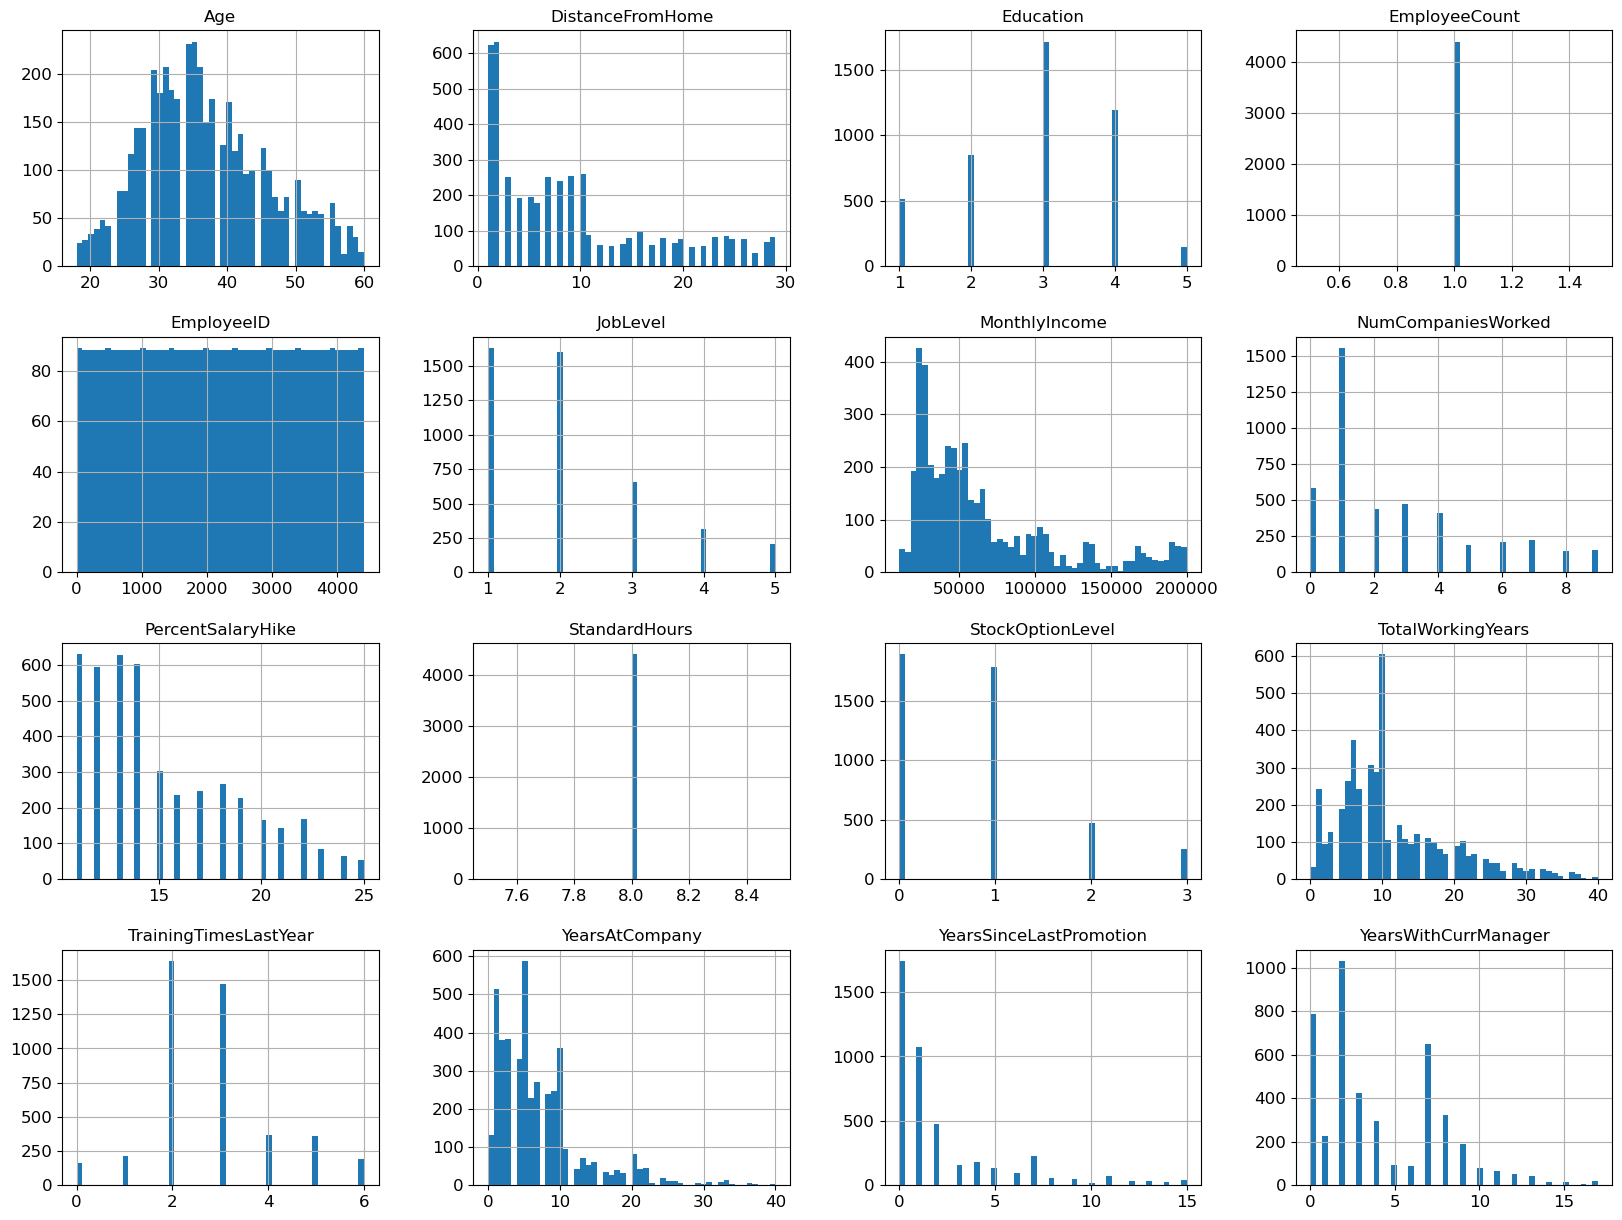

In [88]:
general_data.hist(bins=50, figsize=(20,15))
plt.show()

# Remarques

La colonne StandardHours ne contient qu'une seule valeur, et n'est donc pas pertinente.

#### Classification Ascendante Hiérarchique

In [89]:
print(general_data["BusinessTravel"].value_counts())
print('______________________________________')
print(general_data["Department"].value_counts())
print('______________________________________')
print(general_data["EducationField"].value_counts())
print('______________________________________')
print(general_data["JobRole"].value_counts())
print('______________________________________')
print(general_data["Attrition"].value_counts())
print('______________________________________')
print(general_data["Gender"].value_counts())
print('______________________________________')
print(general_data["MaritalStatus"].value_counts())
print('______________________________________')
print(general_data["Over18"].value_counts())
print('______________________________________')

BusinessTravel
Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: count, dtype: int64
______________________________________
Department
Research & Development    2883
Sales                     1338
Human Resources            189
Name: count, dtype: int64
______________________________________
EducationField
Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: count, dtype: int64
______________________________________
JobRole
Sales Executive              978
Research Scientist           876
Laboratory Technician        777
Manufacturing Director       435
Healthcare Representative    393
Manager                      306
Sales Representative         249
Research Director            240
Human Resources              156
Name: count, dtype: int64
______________________________________
Attrition
No     3699
Yes     711
Name: count, dtype: int64
_____________

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

general_data_cleaned = general_data.copy() # A new copy of data set


# Fusion general_data avec employee_survey_data
columns_to_merge_employee = ['EmployeeID', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']
general_data_cleaned = pd.merge(general_data_cleaned, employee_survey_data[columns_to_merge_employee], on="EmployeeID", how="inner")

# De même pour manager_survey_data
# Supposons que 'JobInvolvement' et 'PerformanceRating' sont les seules colonnes autres que 'EmployeeID' que vous voulez de manager_survey_data
columns_to_merge_manager = ['EmployeeID', 'JobInvolvement', 'PerformanceRating']
general_data_cleaned = pd.merge(general_data_cleaned, manager_survey_data[columns_to_merge_manager], on="EmployeeID", how="inner")


general_data_cleaned.drop("BusinessTravel", axis=1, inplace=True) # Pas numérique
general_data_cleaned.drop("Department", axis=1, inplace=True) # Pas numérique
general_data_cleaned.drop("EducationField", axis=1, inplace=True) # Pas numérique
general_data_cleaned.drop("JobRole", axis=1, inplace=True) # Pas numérique
general_data_cleaned.drop("MaritalStatus", axis=1, inplace=True) # Pas numérique

general_data_cleaned.drop("Over18", axis=1, inplace=True) # Pas numérique et toujours la même valeur
general_data_cleaned.drop("NumCompaniesWorked", axis=1, inplace=True) # MANQUE DES VALEURS
general_data_cleaned.drop("TotalWorkingYears", axis=1, inplace=True) # MANQUE DES VALEURS
general_data_cleaned.drop("EnvironmentSatisfaction", axis=1, inplace=True) # MANQUE DES VALEURS
general_data_cleaned.drop("JobSatisfaction", axis=1, inplace=True) # MANQUE DES VALEURS
general_data_cleaned.drop("WorkLifeBalance", axis=1, inplace=True) # MANQUE DES VALEURS

#Pour les colonnes gender et attrition, on les transforme en booléen sur la base des données de la table
general_data_cleaned['gender_bool'] = general_data_cleaned['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
general_data_cleaned['attrition_bool'] = general_data_cleaned['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

general_data_cleaned.drop("Attrition", axis=1, inplace=True) # On supprime après avoir créé un booléen
general_data_cleaned.drop("Gender", axis=1, inplace=True)  # On supprime après avoir créé un booléen

general_data_cleaned.head()

Les données des fichiers in_time and out_time étant dures à exploiter en l'état (avec une colonne pour chaque date du fichier), nous les mergons dans un seul fichier qui comporte une colonne date.

In [23]:
# Remodeler les DataFrames en format long
in_time_data_melted = in_time_data
out_time_data_melted = out_time_data

# Rename the first column to 'employeeID'
in_time_data_melted.rename(columns={in_time_data_melted.columns[0]: 'employeeID'}, inplace=True)
out_time_data_melted.rename(columns={out_time_data_melted.columns[0]: 'employeeID'}, inplace=True)

# Melt the dataframe
in_time_data_melted = in_time_data_melted.melt(id_vars=['employeeID'], var_name='date', value_name='in_time')
in_time_data_melted = in_time_data_melted.dropna(subset=['in_time'])

out_time_data_melted = out_time_data_melted.melt(id_vars=['employeeID'], var_name='date', value_name='out_time')
out_time_data_melted = out_time_data_melted.dropna(subset=['out_time'])

# Merge the two dataframes on 'employeeID' and 'date'
in_out_time_data_cleaned = pd.merge(in_time_data_melted, out_time_data_melted, on=['employeeID', 'date'])

# Assure que 'in_time' et 'out_time' sont au format datetime
in_out_time_data_cleaned['in_time'] = pd.to_datetime(in_out_time_data_cleaned['in_time'])
in_out_time_data_cleaned['out_time'] = pd.to_datetime(in_out_time_data_cleaned['out_time'])

# Calcule la différence
in_out_time_data_cleaned['worktime'] = in_out_time_data_cleaned['out_time'] - in_out_time_data_cleaned['in_time']

# Affiche les premières lignes pour vérifier
in_out_time_data_cleaned.head()




,employeeID,date,in_time,out_time,worktime
0,1,2015-01-02,2015-01-02 09:43:45,2015-01-02 16:56:15,0 days 07:12:30
1,2,2015-01-02,2015-01-02 10:15:44,2015-01-02 18:22:17,0 days 08:06:33
2,3,2015-01-02,2015-01-02 10:17:41,2015-01-02 16:59:14,0 days 06:41:33
3,4,2015-01-02,2015-01-02 10:05:06,2015-01-02 17:25:24,0 days 07:20:18
4,5,2015-01-02,2015-01-02 10:28:17,2015-01-02 18:31:37,0 days 08:03:20


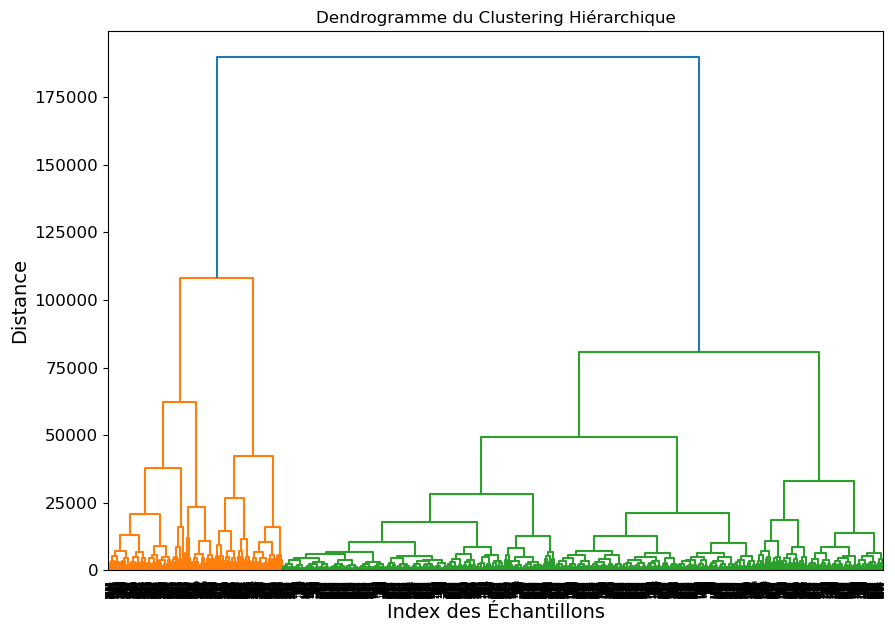

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculer les liens hiérarchiques
linked = linkage(general_data_cleaned, 'complete') # 'ward' est une méthode de linkage; vous pouvez en essayer d'autres comme 'single', 'complete', etc.

# Créer et afficher le dendrogramme
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrogramme du Clustering Hiérarchique')
plt.xlabel('Index des Échantillons')
plt.ylabel('Distance')
plt.show()

<a id="creation-jeu-de-test"></a>
# Création d'un jeu de test

#### Jeu de test aléatoire
Afin d'éviter de faire du Data Snooping, nous avons désormais modifié ce jeu de données et allons désormais réserver un échantillon de test, qui ne sera exploité que lorsque nous aurons une meilleure vision de notre modèle

Nous mettons aléatoirement 20% des données de côtés.

In [25]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(general_data_cleaned, test_size=0.2, random_state=42)
print(test_set.head())
print(train_set.head())


      Age  DistanceFromHome  Education  EmployeeCount  EmployeeID  JobLevel  \
1413   49                23          1              1        1414         2   
3352   27                 1          3              1        3353         1   
3970   35                10          1              1        3971         2   
3629   52                 3          2              1        3630         3   
144    30                 5          4              1         145         2   

      MonthlyIncome  PercentSalaryHike  StandardHours  StockOptionLevel  \
1413          92410                 19              8                 1   
3352          20580                 14              8                 1   
3970          43230                 18              8                 3   
3629          25790                 19              8                 1   
144           54100                 17              8                 1   

      TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
14

<a id="echantillonage-stratifie"></a>

# Echantillonage stratifié

Il faut s'assurer de ne pas introduire de biais statistique, d'une part, et de respecter le [_stratified sampling_](https://en.wikipedia.org/wiki/Stratified_sampling). Par exemple, dans le cas de notre exemple, on va tâcher d'avoir une distribution représentative du `MonthlyIncome`. Pour éviter les biais de sous-représentation ou sur-représentation, on essaye d'avoir un nombre limité de strates (strates que l'on préfèrera donc assez larges).

Après discussion avec des experts métiers, nous sommes convaincus que le revenu moyen est une variable-clef. Nous désirons effectuer un échantillonage où les jeux d'entraînement et de test respectent les proportions de représentation des différentes catégories de salaire. Pour celà, nous commençons par créer une variable `monthly_income`, pendant catégoriel de la variable numérique `MonthlyIncome`


<Axes: >

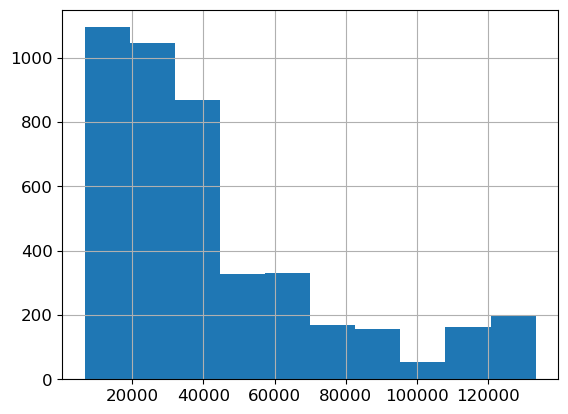

In [26]:
general_data_cleaned["monthly_income"] = np.ceil(general_data_cleaned["MonthlyIncome"]/1.5)

general_data_cleaned["monthly_income"].hist()


# Conclusion

CECI EST LA CONCLUSION DU PROJET


# Bibliographie

CECI EST LA BIBLIOGRAPHIE DU PROJET